In [9]:
import zipfile
from skimage import io
from matplotlib import pyplot as plt
from skimage.transform import resize
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from tqdm import tqdm, tqdm_notebook
import numpy as np
from skimage.io import imread

In [5]:
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(3456, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [6]:
the_model = SimpleCnn(2)
the_model.load_state_dict(torch.load('model1'))

<All keys matched successfully>

In [49]:
image = imread("IMG_7847.jpeg")

In [25]:
image_re = resize(image, (256, 256), mode='constant', anti_aliasing=True,)

In [31]:
x = np.zeros((3, 256, 256))
for i in range(256):
    for j in range(256):
        for c in range(3):
            x[c][i][j] = image_re[i][j][c]   

In [46]:
with torch.no_grad():
    ans = the_model(torch.Tensor(x).unsqueeze(0))

In [47]:
ans = list(torch.argmax(ans, 1).numpy())
ans = ans[0]

Деталь на фотографии большая!


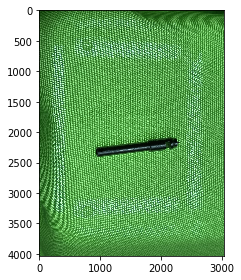

In [48]:
io.imshow(image);
if ans == 1:
    print('Деталь на фотографии большая!')
else:
    print('Деталь на фотографии маленькая!')